# 成功したか否かをターゲットとしてプロファイリングしてみる

In [11]:
import pandas as pd
import sweetviz as sv

In [7]:
DATA = pd.read_csv("data/kickstarter.csv")

## statusの値を眺める
successとfailedは問答無用で使うとして、その他の値はどうだろう

In [8]:
DATA.groupby("status").describe().transpose()

status                      canceled        failed          live  \
ID               count  3.877300e+04  1.977190e+05  2.799000e+03   
                 mean   1.076100e+09  1.074639e+09  1.084275e+09   
                 std    6.192973e+08  6.192215e+08  6.123351e+08   
                 min    9.215800e+04  5.971000e+03  5.113750e+05   
                 25%    5.409964e+08  5.385642e+08  5.753541e+08   
                 50%    1.079424e+09  1.073242e+09  1.074350e+09   
                 75%    1.611364e+09  1.611052e+09  1.610678e+09   
                 max    2.147388e+09  2.147467e+09  2.146469e+09   
goal             count  3.877300e+04  1.977190e+05  2.799000e+03   
                 mean   8.620549e+04  6.734685e+04  7.676239e+04   
                 std    1.470165e+06  1.447227e+06  1.885400e+06   
                 min    1.000000e-02  1.500000e-01  1.000000e+00   
                 25%    3.300000e+03  2.500000e+03  2.400000e+03   
                 50%    1.000000e+04  7.500000e+03  7.500000e+03   
                 75%    3.000000e+04  2.000000e+04  2.321500e+04   
                 max    1.000000e+08  1.000000e+08  9.900000e+07   
pledged          count  3.877300e+04  1.977190e+05  2.799000e+03   
                 mean   2.646162e+03  1.426971e+03  9.085240e+03   
                 std    1.700476e+04  9.564415e+03  5.200792e+04   
                 min    0.000000e+00  0.000000e+00  0.000000e+00   
                 25%    0.000000e+00  3.000000e+00  1.000000e+01   
                 50%    8.800000e+01  1.000000e+02  2.750000e+02   
                 75%    9.340000e+02  6.710000e+02  2.037000e+03   
                 max    1.076751e+06  1.748630e+06  1.104279e+06   
backers          count  3.877300e+04  1.977190e+05  2.799000e+03   
                 mean   2.599141e+01  1.642235e+01  6.809968e+01   
                 std    1.360769e+02  7.122412e+01  3.825557e+02   
                 min    0.000000e+00  0.000000e+00  0.000000e+00   
                 25%    0.000000e+00  1.000000e+00  1.000000e+00   
                 50%    3.000000e+00  3.000000e+00  5.000000e+00   
                 75%    1.500000e+01  1.200000e+01  2.600000e+01   
                 max    9.326000e+03  6.550000e+03  1.074800e+04   
usd_pledged_real count  3.877300e+04  1.977190e+05  2.799000e+03   
                 mean   2.340884e+03  1.320604e+03  5.869167e+03   
                 std    1.352503e+04  6.820249e+03  3.143056e+04   
                 min    0.000000e+00  0.000000e+00  0.000000e+00   
                 25%    0.000000e+00  2.640000e+00  1.000000e+01   
                 50%    8.700000e+01  1.000000e+02  2.591600e+02   
                 75%    9.078100e+02  6.630000e+02  1.798000e+03   
                 max    1.076751e+06  7.573529e+05  7.244238e+05   
usd_goal_real    count  3.877300e+04  1.977190e+05  2.799000e+03   
                 mean   7.559020e+04  6.317474e+04  6.253528e+04   
                 std    1.281488e+06  1.435683e+06  1.875468e+06   
                 min    1.000000e-02  1.500000e-01  1.000000e+00   
                 25%    3.290090e+03  2.500000e+03  2.052680e+03   
                 50%    1.000000e+04  7.500000e+03  6.547090e+03   
                 75%    3.000000e+04  2.000000e+04  1.850549e+04   
                 max    1.000000e+08  1.663614e+08  9.900000e+07   

status                    successful     suspended     undefined  
ID               count  1.339560e+05  1.845000e+03  3.562000e+03  
                 mean   1.073727e+09  1.094858e+09  1.085224e+09  
                 std    6.191514e+08  6.147066e+08  6.145164e+08  
                 min    2.110900e+04  5.606610e+05  6.290140e+05  
                 25%    5.354443e+08  5.805427e+08  5.575375e+08  
                 50%    1.076595e+09  1.100648e+09  1.078597e+09  
                 75%    1.608161e+09  1.625325e+09  1.613349e+09  
                 max    2.147476e+09  2.147267e+09  2.147454e+09  
goal             count  1.339560e+05  1.845000e+03  3.562000e+03

`live, undefined, suspended`は成功可否としては定義不能扱いが良さげ。
`canceled`を失敗扱いにするか迷う。

なんとなく、成功しそうにないから途中でキャンセル扱いにするとかありそうな気もするが、途中で別途資金調達の目処が立ったりそもそもそのPJが必要なくなったりでキャンセルもあるかもだしなあ

みてみる

In [9]:
DATA.query('status == "canceled"')

,ID,name,main_category,sub_category,country,currency,launched,deadline,goal,pledged,backers,usd_pledged_real,usd_goal_real,status
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,United States,USD,2015-07-04T08:35:03+0000,2015-08-29,19500.0,1283.00,14,1283.00,19500.00,canceled
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Design,Product Design,United States,USD,2014-04-24T18:14:43+0000,2014-05-29,125000.0,8233.00,58,8233.00,125000.00,canceled
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Film & Video,Documentary,United States,USD,2014-07-11T21:55:48+0000,2014-08-10,65000.0,6240.57,43,6240.57,65000.00,canceled
68,1000256760,"Raise the Woof, expanding the love (Canceled)",Design,Design,Canada,CAD,2015-07-08T21:46:53+0000,2015-08-07,15000.0,700.00,6,535.09,11466.14,canceled
70,1000260691,Gizbee™ Unlimited Removable Storage for Your T...,Technology,Gadgets,United States,USD,2016-02-29T20:30:27+0000,2016-03-25,87000.0,2030.00,15,2030.00,87000.00,canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378633,999893629,Ciridian Helix (Canceled),Publishing,Fiction,United States,USD,2014-08-08T21:49:31+0000,2014-09-11,1000.0,100.00,2,100.00,1000.00,canceled
378636,999931480,Google Glass Shield (Canceled),Technology,3D Printing,United States,USD,2014-05-05T20:22:45+0000,2014-05-26,6500.0,0.00,0,0.00,6500.00,canceled
378641,999955533,Cards and Chit Network Season 2! (Canceled),Games,Tabletop Games,United States,USD,2016-01-24T16:03:27+0000,2016-02-23,500.0,121.00,5,121.00,500.00,canceled
378648,999976312,Angela's Poetry (Canceled),Publishing,Poetry,Canada,CAD,2014-08-06T03:46:07+0000,2014-09-20,5500.0,0.00,0,0.00,4949.60,canceled


下手なことをしてもアレだというのと、性善説に則って適切にステータスを入れてくれる前提で、`canceled`は含めないことにしよう
（is_successとは別でstatusでgroupbyしてEDAする際に含めるのが良さげ）

## 成功したか否かカラムでプロファイリングする

In [10]:
from transforms.dataframes.is_success import dataframe_is_success

IS_SUCCESS_DATA = dataframe_is_success(DATA)
IS_SUCCESS_DATA

,ID,name,main_category,sub_category,country,currency,launched,deadline,goal,pledged,backers,usd_pledged_real,usd_goal_real,is_success
0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,United Kingdom,GBP,2015-08-11T12:12:28+0000,2015-10-09,1000.0,0.0,0,0.0,1533.95,False
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,Narrative Film,United States,USD,2017-09-02T04:43:57+0000,2017-11-01,30000.0,2421.0,15,2421.0,30000.00,False
2,1000004038,Where is Hank?,Film & Video,Narrative Film,United States,USD,2013-01-12T00:20:50+0000,2013-02-26,45000.0,220.0,3,220.0,45000.00,False
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,United States,USD,2012-03-17T03:24:11+0000,2012-04-16,5000.0,1.0,1,1.0,5000.00,False
5,1000014025,Monarch Espresso Bar,Food,Restaurants,United States,USD,2016-02-26T13:38:27+0000,2016-04-01,50000.0,52375.0,224,52375.0,50000.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378647,999975836,"Homemade fresh dog food, Cleveland OH",Food,Small Batch,United States,USD,2017-03-20T22:08:22+0000,2017-04-19,6500.0,154.0,4,154.0,6500.00,False
378650,999977640,The Tribe,Film & Video,Narrative Film,United States,USD,2011-06-22T03:35:14+0000,2011-07-19,1500.0,155.0,5,155.0,1500.00,False
378651,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,Narrative Film,United States,USD,2010-07-01T19:40:30+0000,2010-08-16,15000.0,20.0,1,20.0,15000.00,False
378652,999987933,BioDefense Education Kit,Technology,Technology,United States,USD,2016-01-13T18:13:53+0000,2016-02-13,15000.0,200.0,6,200.0,15000.00,False


In [12]:
report = sv.analyze(IS_SUCCESS_DATA, target_feat="is_success")

                                             |          | [  0%]   00:00 -> (? left)


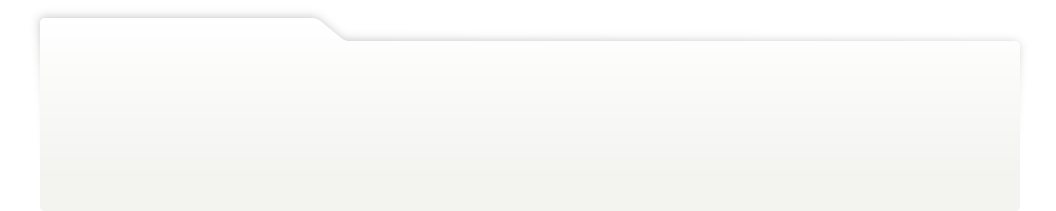
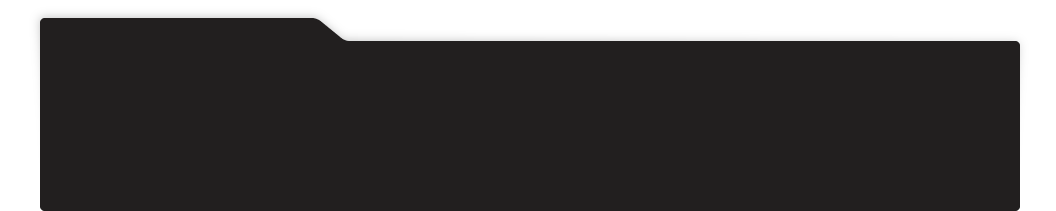
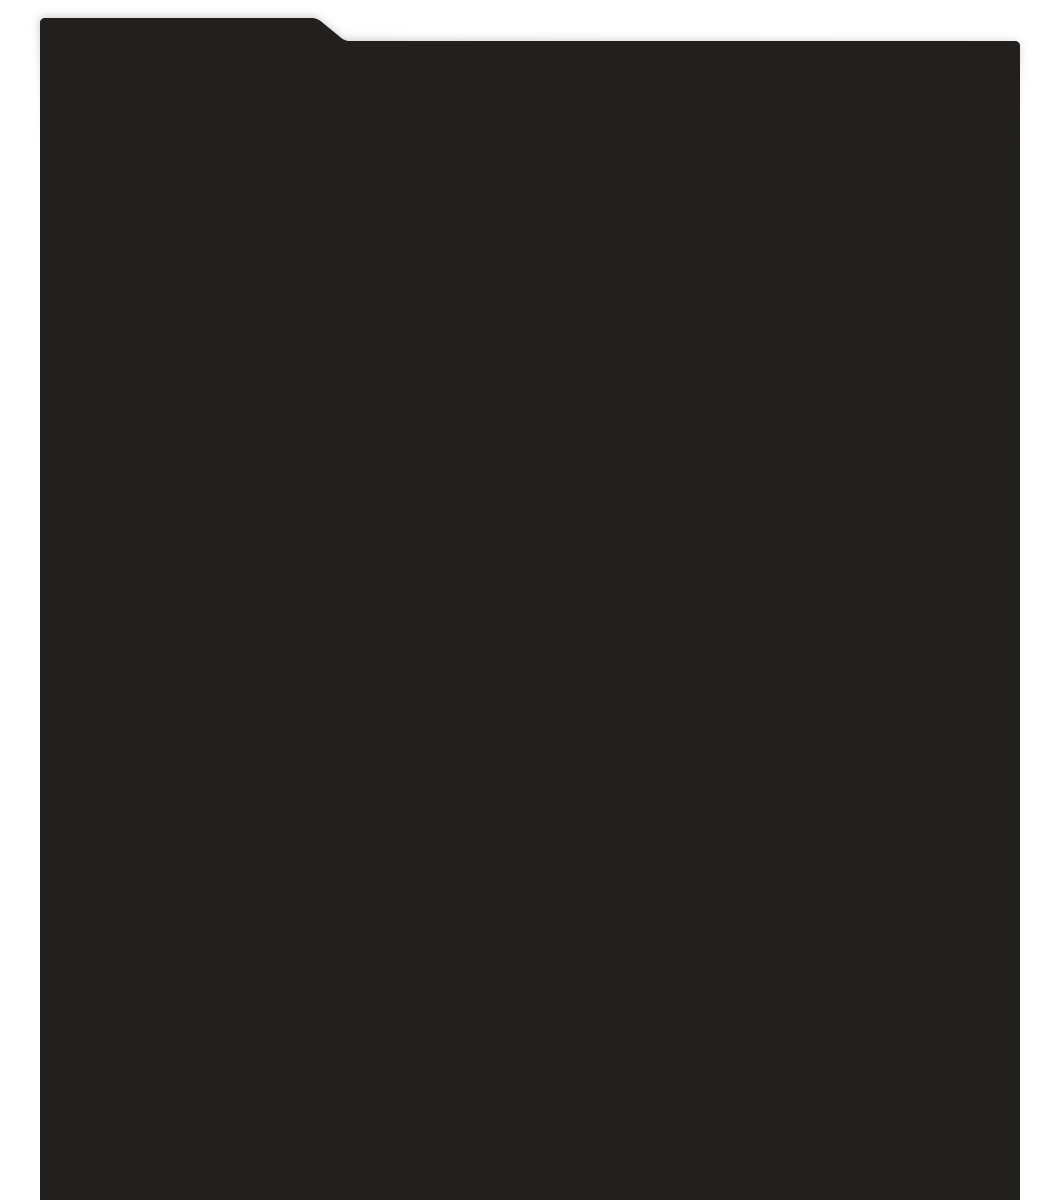
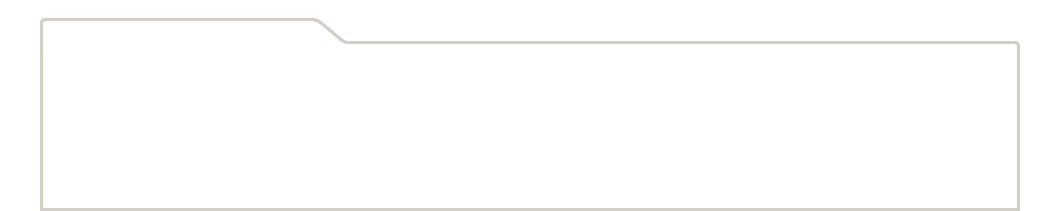
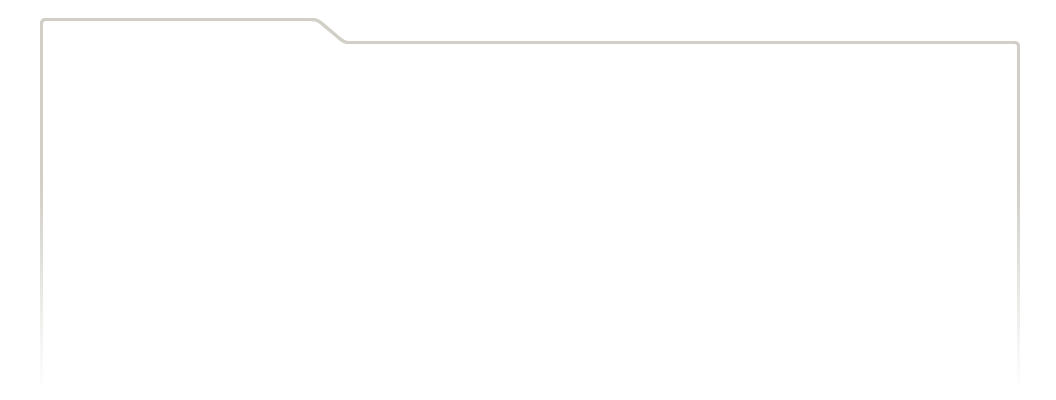
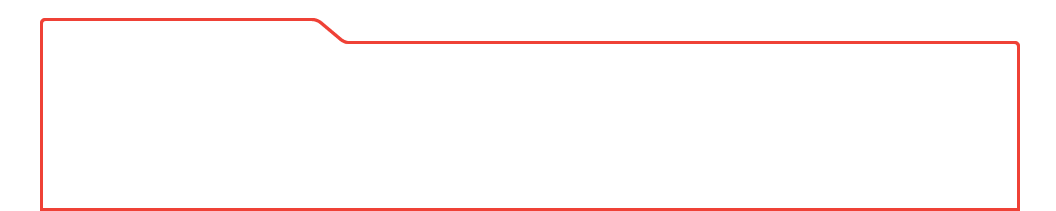
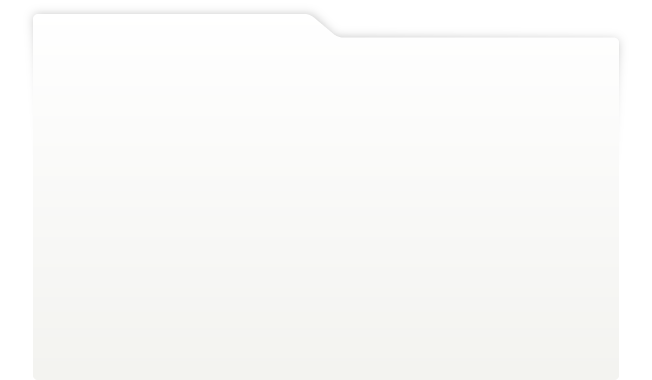
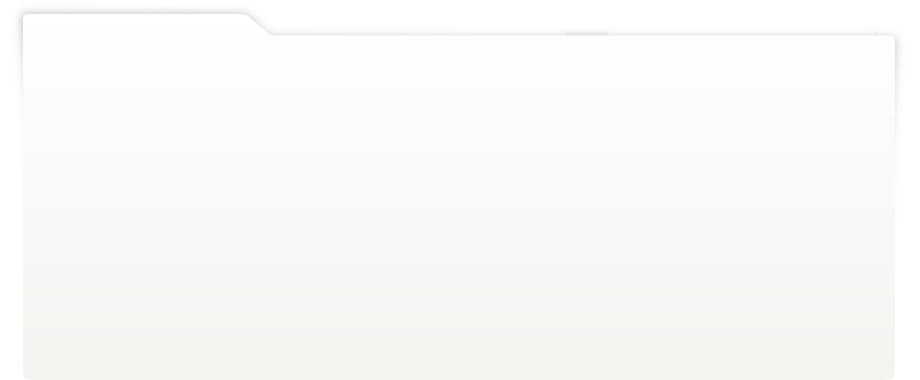
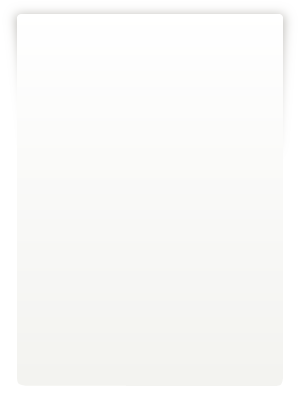
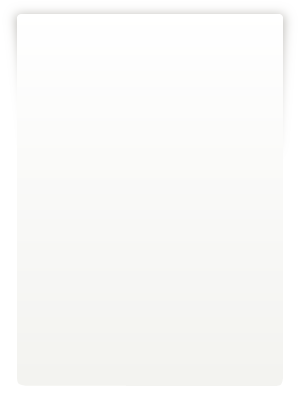
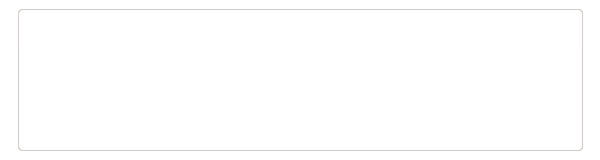
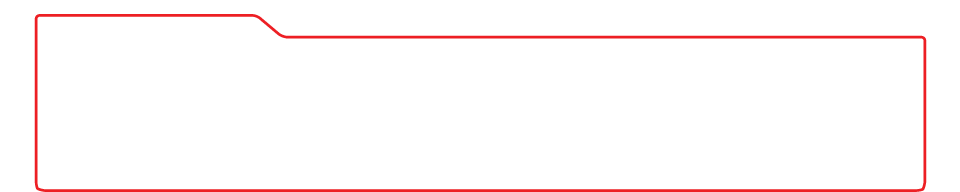
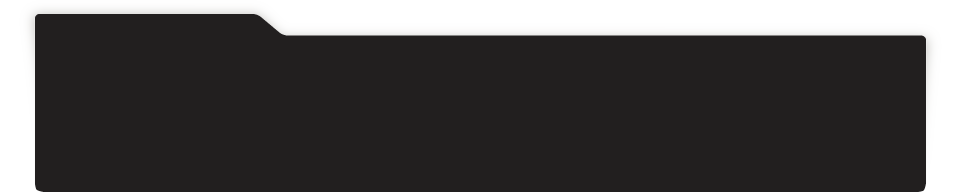
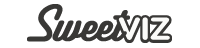
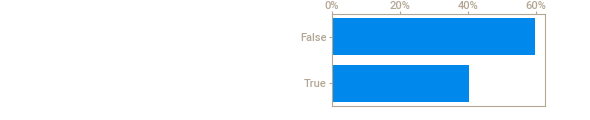
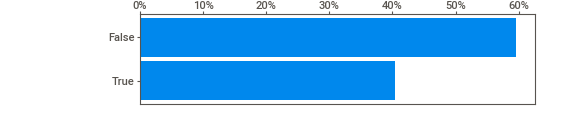
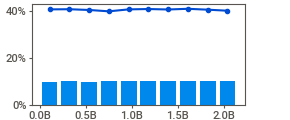
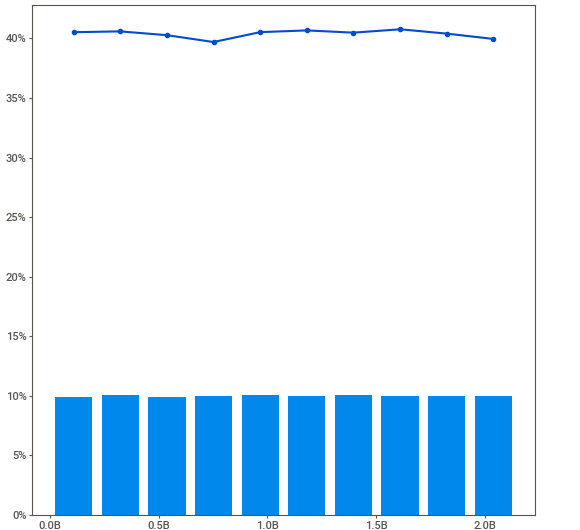
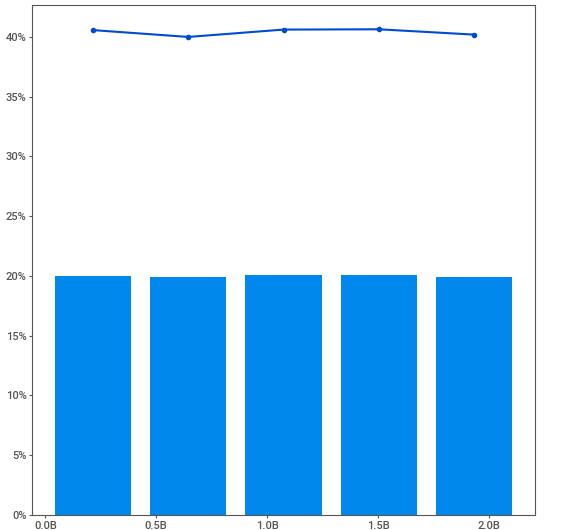
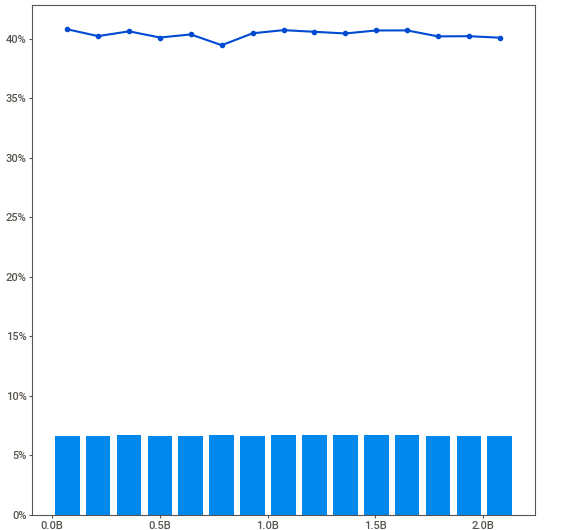
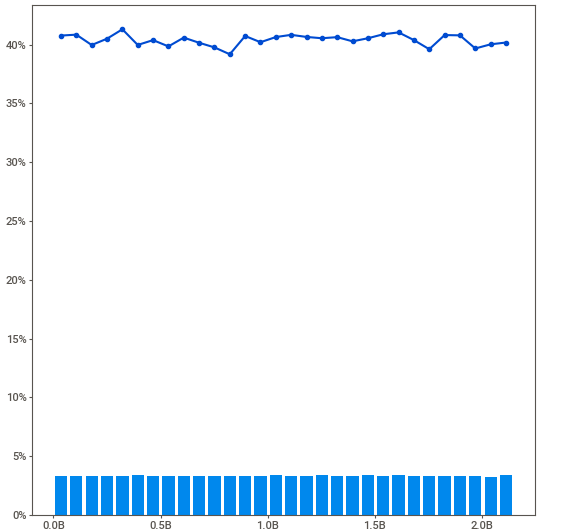
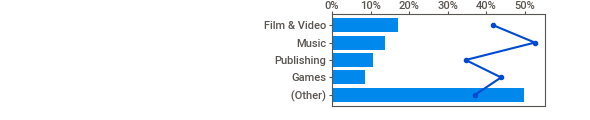
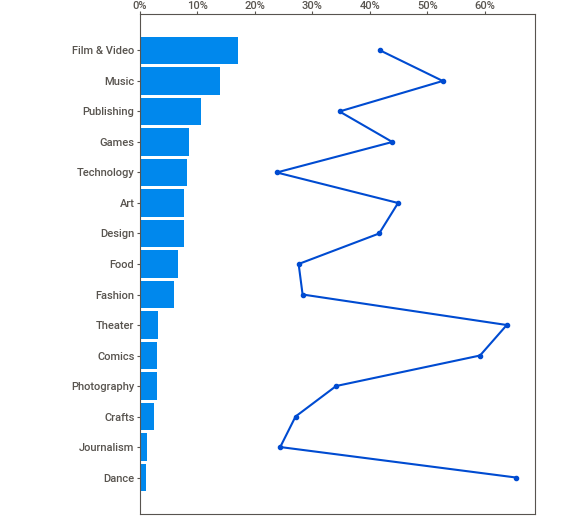
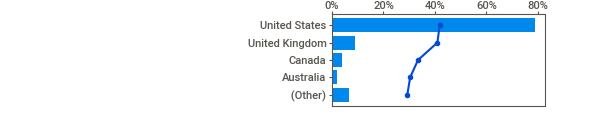
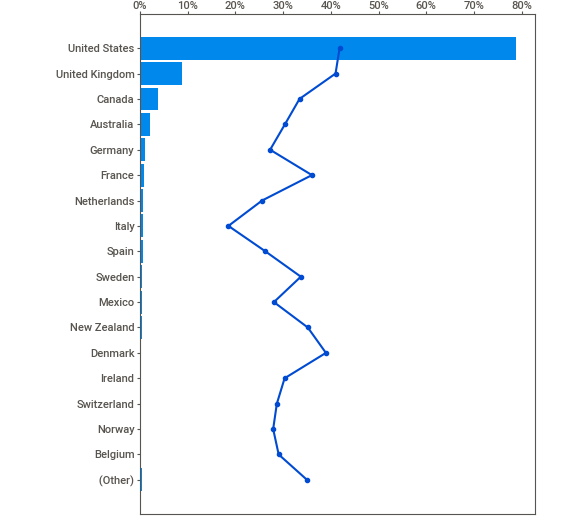
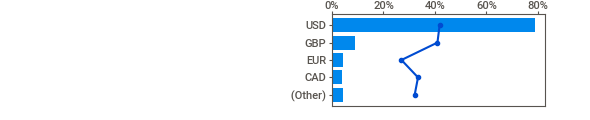
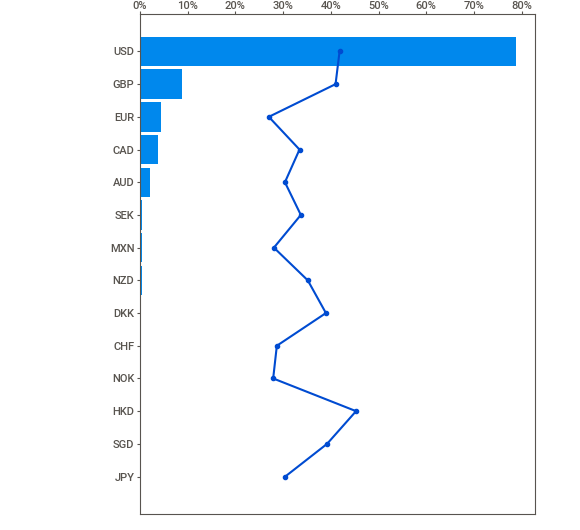
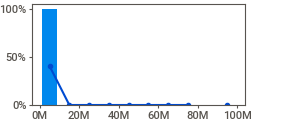
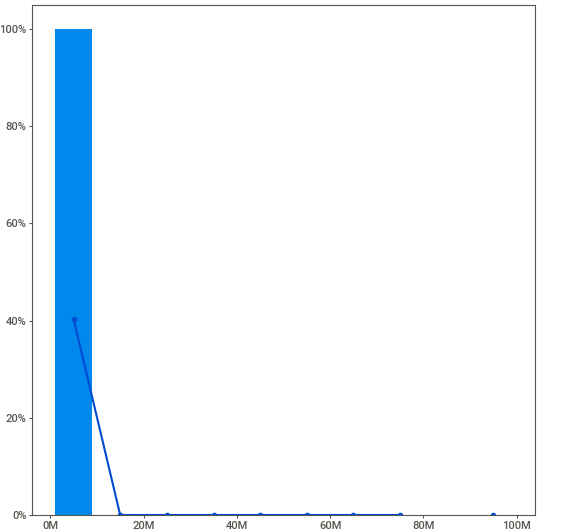
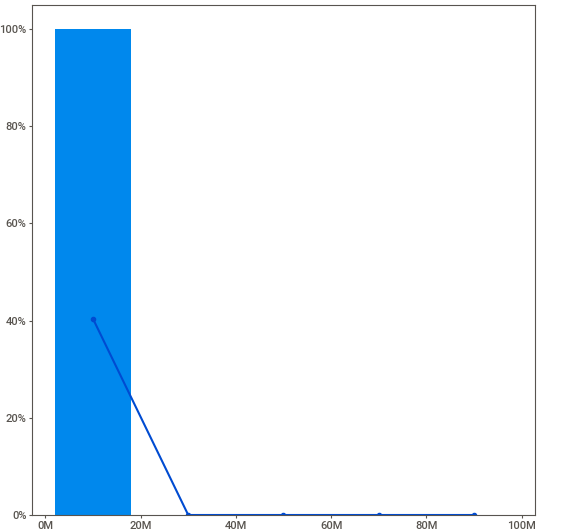
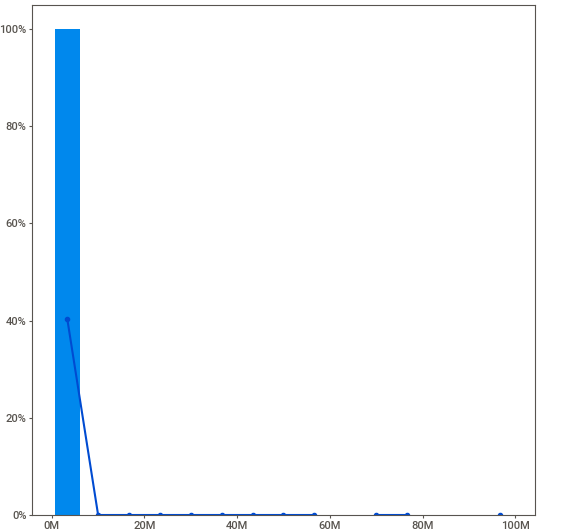
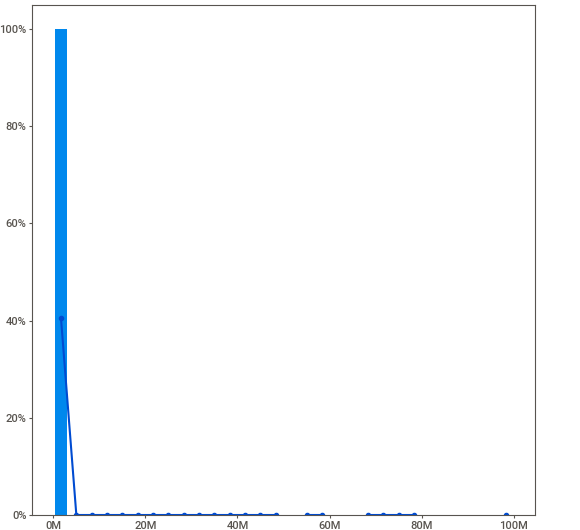
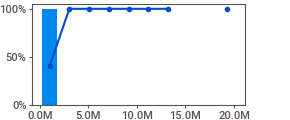
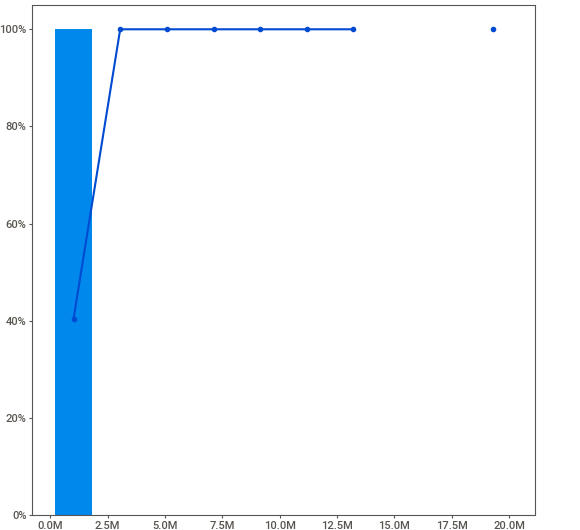
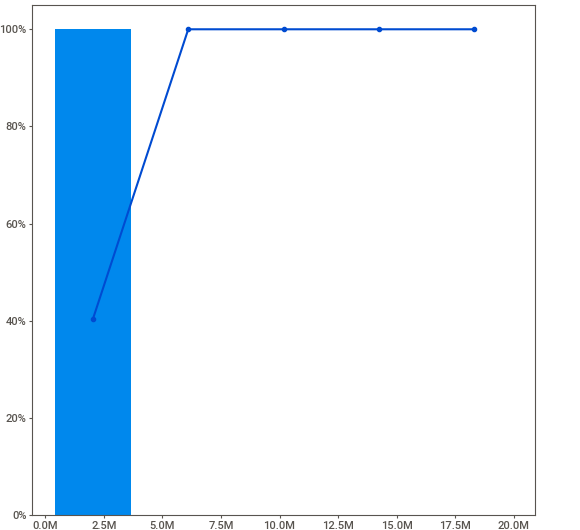
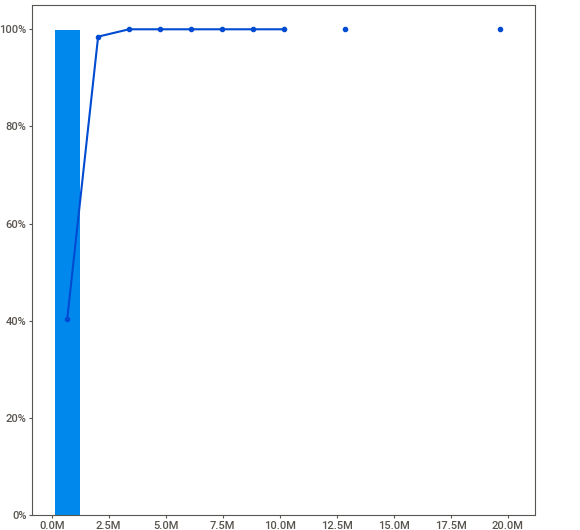
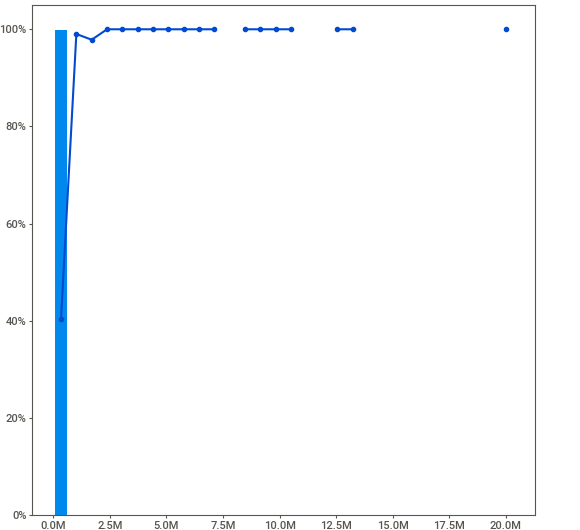
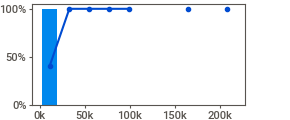
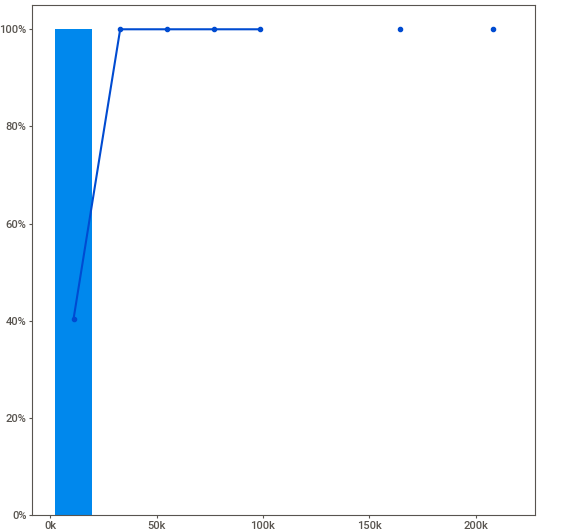
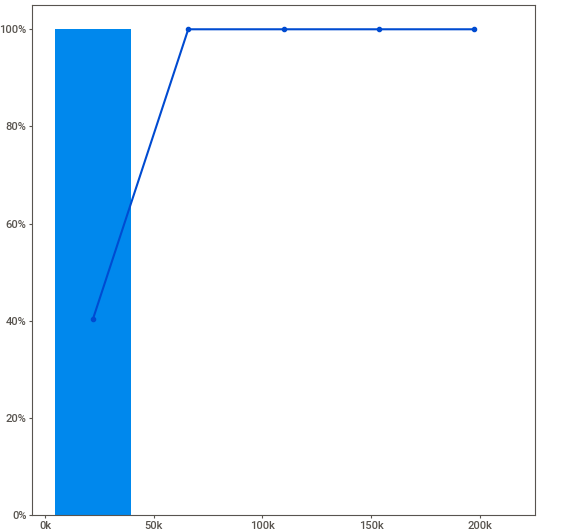
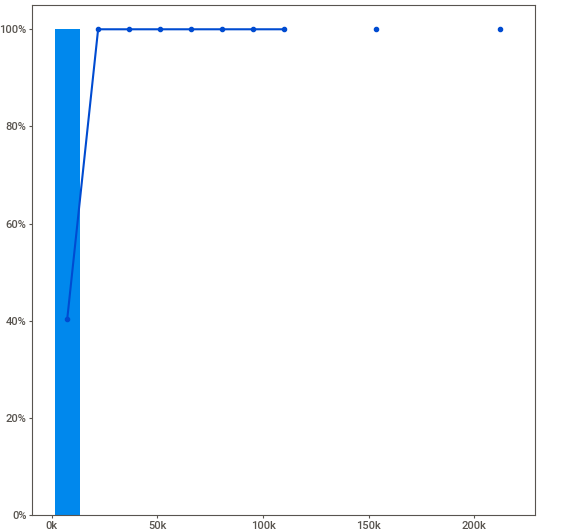
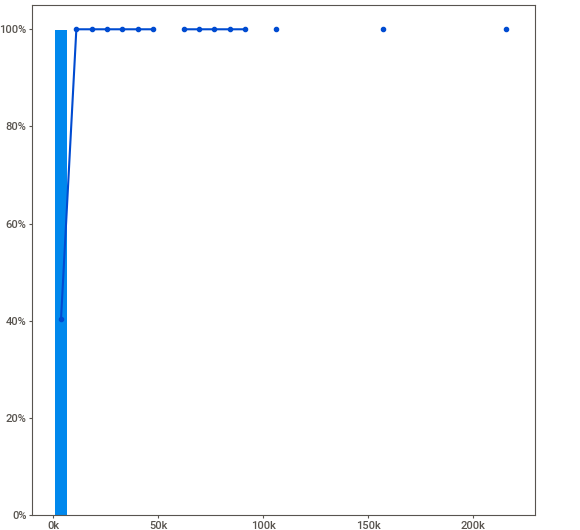
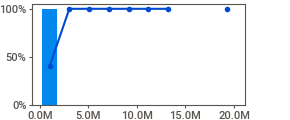
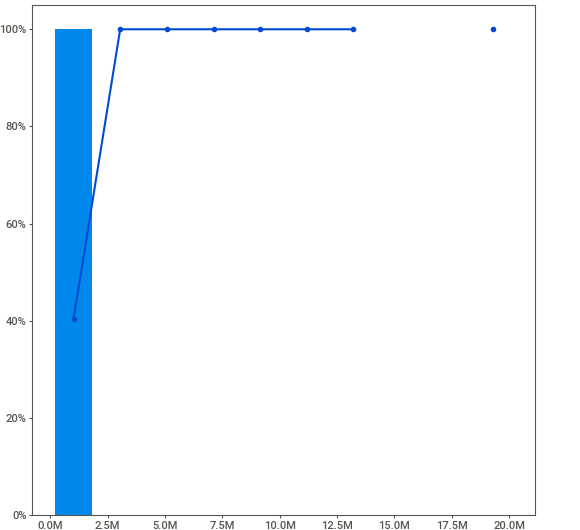
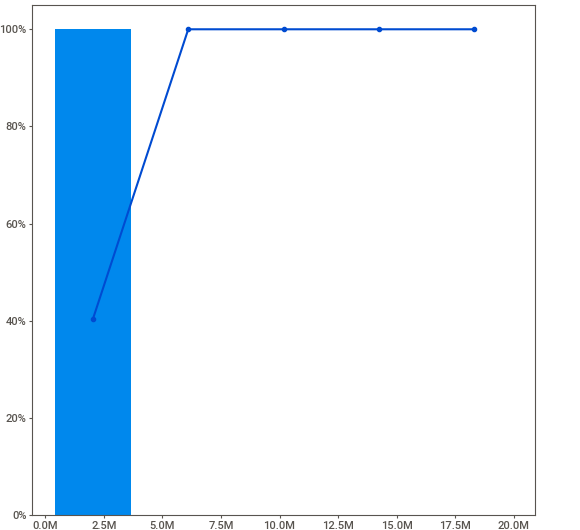
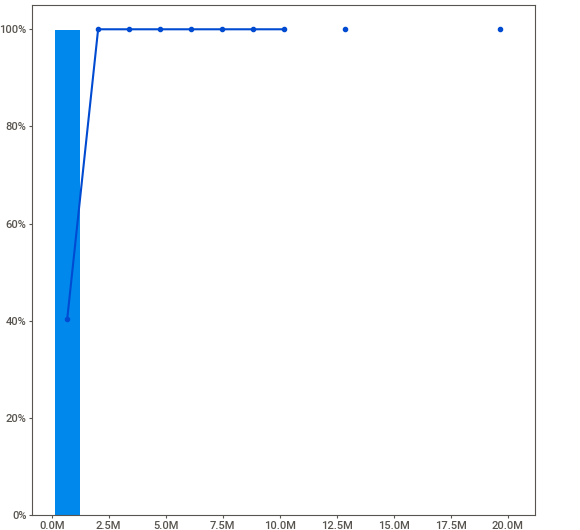
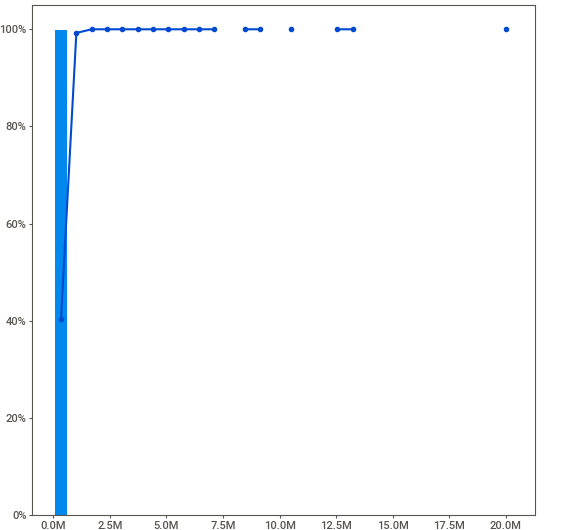
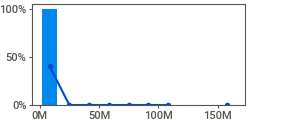
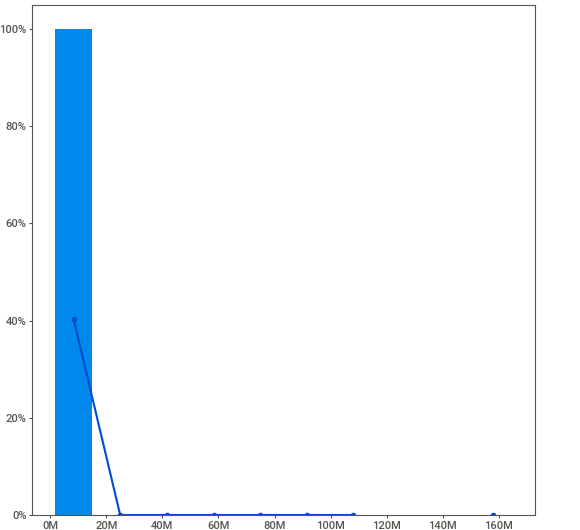
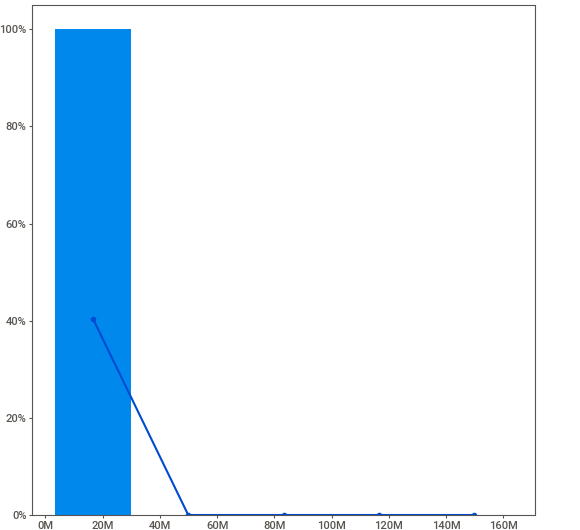
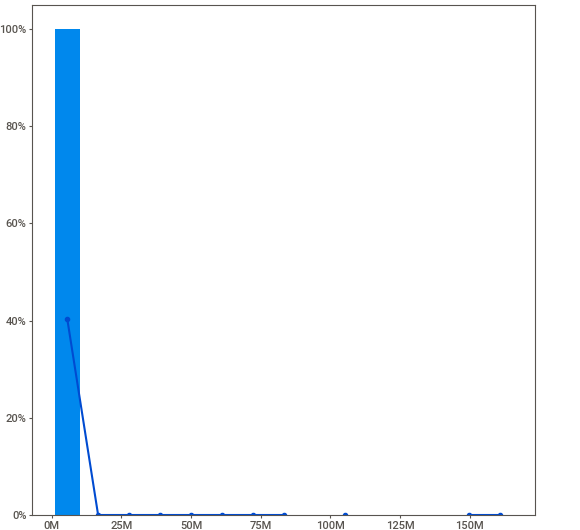
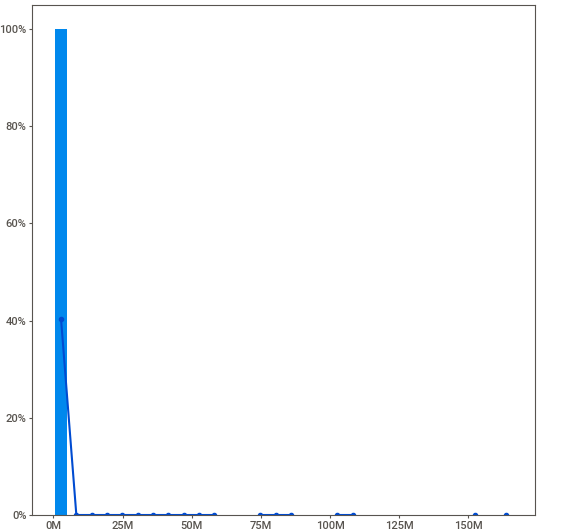
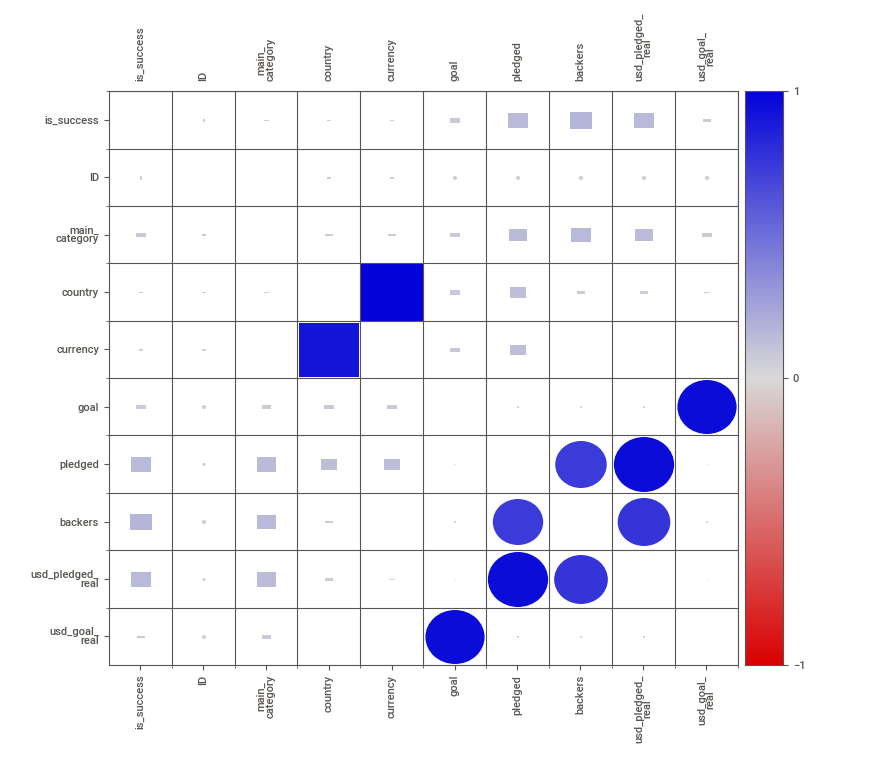
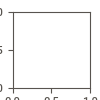

In [14]:
report.show_notebook()

（カラム一覧を見た時点で考えるても良さげだが）↑のラインナップだと特に有用な知見は得られず…

自分でカラムを変形するなりして、targetを見比べるみたいなのをするのが良さげ

ので、profilingは一旦完了で、EDAをする

## コメント2021-09-30
- この時点で決定木とかランダムフォレストするともうちょっと見えるものありそう(0/1を当てるためのモデルを作る)
- ↑よりも本来は、決定木とかのあれを手動で集計したりして仮説をたてるのが良い